1.Retrieve all tags starting from '@' in the entire dataset and save in a file called “References.txt”

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Tweets.csv')

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
text = df['text']
text.head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [ ]:
tags = []
for i in text:
  tags.append([k for k in i.split() if k.startswith('@')])

tags[:5]

In [ ]:
finaltags=[]
for i in tags:
  for k in i:
    if k not in finaltags:
      finaltags.append(k)

finaltags

In [ ]:
string = " ".join(finaltags)
with open('/content/References.txt','w+') as f:
  f.write(string)

ALTERNATIVE SOLUTION

In [2]:
import pandas as pd
import re
import itertools

df=pd.read_csv('/content/Tweets.csv')
df=df[['text','airline_sentiment']]

r = re.compile(r"([@])(\w+)\b")

AllReferences=map(lambda x: r.findall(x),df['text'])

AllUniqueReferencesCombined=set(list(itertools.chain.from_iterable(AllReferences)))

References=map(lambda x:x[0]+x[1],AllUniqueReferencesCombined)

file=open("References.txt",'a')
for each in References:
    file.write(each+"\n")
file.close()

2.Extract all noun phrases from their dataset and save them in different lines in a file named “Noun Phrases for < airline_sentiment > Review .txt” (You can choose your own grammar for noun phrase).
Here < airline_sentiment > will have 3 different values: positive, negative and neutral so 3 files will be created.

In [3]:
import nltk
def GetNounPhrases(s):
    try:
        sentences = nltk.sent_tokenize(s)
        sentences = [nltk.word_tokenize(sent) for sent in sentences]
        sentences = [nltk.pos_tag(sent) for sent in sentences]
    except:
        return []

    else:

        grammar=r"NP:{<DT><NN|NNS|NNP|NNPS>*<NN|NNS|NNP|NNPS>}"

        cp = nltk.RegexpParser(grammar)


        noun_phrases_list = [[' '.join(leaf[0] for leaf in tree.leaves())
                              for tree in cp.parse(sent).subtrees()
                              if tree.label()=='NP']
                              for sent in sentences]
        return noun_phrases_list

import itertools
for group,sub in df.groupby('airline_sentiment'):
    noun_phrases=map(lambda x: GetNounPhrases(x),sub['text'])
    noun_phrases=list(itertools.chain.from_iterable(noun_phrases))
    AllNounPhrases=set(list(itertools.chain.from_iterable(noun_phrases)))
    filename="Noun Phrases for "+str(group)+" Review .txt"
    file=open(filename,'a')
    for each in AllNounPhrases:
        file.write(each+"\n")
    file.close()

3.Extract all verb phrases from their dataset and save them in different lines in a file named “Verb Phrases for < airline_sentiment > Review .txt” (You can choose your
own grammar for noun phrase
).Here < airline_sentiment > will have 3 different values: positi
ve , negative and neutral so 3 files will be created.

In [4]:
import nltk
def GetVerbPhrases(s):
    try:
        sentences = nltk.sent_tokenize(s)
        sentences = [nltk.word_tokenize(sent) for sent in sentences]
        sentences = [nltk.pos_tag(sent) for sent in sentences]
    except:
        return []

    else:

        grammar=r"VP:{<VB|VBD|VBG|VBZ|VBP|VBN>*<VB|VBD|VBG|VBZ|VBP|VBN><RB|RBR>*<RB|RBR>}"

        cp = nltk.RegexpParser(grammar)


        noun_phrases_list = [[' '.join(leaf[0] for leaf in tree.leaves())
                              for tree in cp.parse(sent).subtrees()
                              if tree.label()=='VP']
                              for sent in sentences]
        return noun_phrases_list

import itertools
for group,sub in df.groupby('airline_sentiment'):
    verb_phrases=map(lambda x: GetVerbPhrases(x),sub['text'])
    verb_phrases=list(itertools.chain.from_iterable(verb_phrases))
    AllVerbPhrases=set(list(itertools.chain.from_iterable(verb_phrases)))
    filename="Verb Phrases for "+str(group)+" Review .txt"
    file=open(filename,'a')
    for each in AllVerbPhrases:
        file.write(each+"\n")
    file.close()

4.For each sentiment, make a well labelled pie chart showing distribution of Noun Phrases and Verb Phrases of that sentiment
from the data set. Use the above created files to get the frequencies.

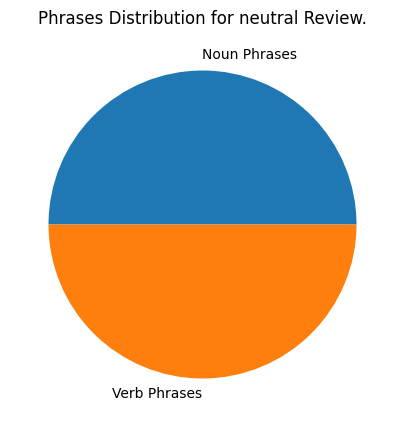

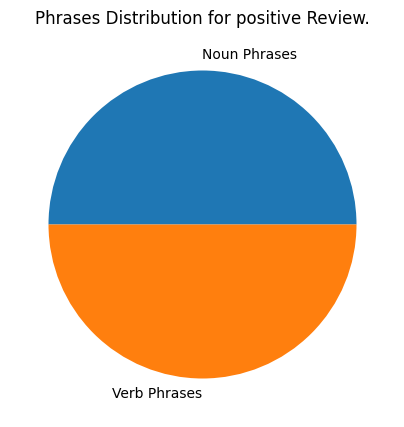

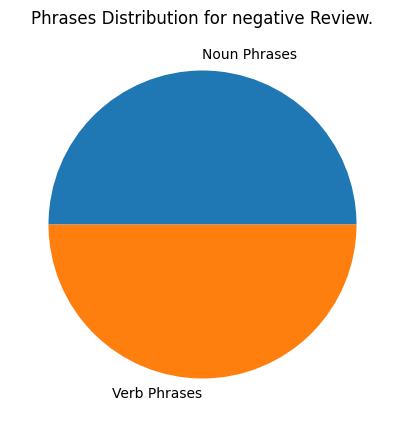

In [5]:
#Plotting a pie chart
def PlotPieChart(sentiment):
    noun_phrase_file="Noun Phrases for "+str(sentiment)+" Review .txt"
    verb_phrase_file="Verb Phrases for "+str(sentiment)+" Review .txt"
    noun_phrase_count=len(noun_phrase_file.split("\n"))
    verb_phrase_count=len(verb_phrase_file.split("\n"))
    counts=[noun_phrase_count,verb_phrase_count]
    labels=['Noun Phrases','Verb Phrases']

    import matplotlib.pyplot as plt
    plt.figure(figsize=(5,5))
    plt.pie(counts,labels=labels)
    plt.title("Phrases Distribution for "+str(sentiment)+" Review.")
    plt.show()

for each in df['airline_sentiment'].unique():
    PlotPieChart(each)